# Henry Pham
# Project 5 - Predicting US Retail Sales Using Time Series

In [1]:
# ---- Project 5 ----

# Introduction

In [2]:
# The aim of this project is to develop an accurate and actionable predictive model for forecasting retail sales in the United States using advanced time series analysis techniques. 
# Accurate predictions of U.S. retail sales are essential for retailers, economists, and policymakers who rely on this critical economic indicator to make informed decisions and navigate the dynamic landscape of the retail sector. 
# By harnessing the power of time series analysis and historical retail sales data, this project seeks to provide valuable insights and predictive capabilities that can enhance strategic planning and decision-making.

# Data Sources

In [3]:
# Retail Sales: https://www.alphavantage.co/query?function=RETAIL_SALES&apikey=demo 

# Required Libraries

In [4]:
# matplotlib: data visualization library for Python, widely used in data analysis, scientific research, engineering, and visualization tasks.
# numpy: numerical computations and data manipulation in Python.
# pandas: data manipulation, preprocessing, cleaning, transformation, exploration, and visualization.
# seaborn: a Python data visualization, widely used in data analysis, statistical modeling, and exploratory data analysis tasks.
# scikit-learn: also known as sklearn, provides an efficient framework for various machine learning tasks, such as classification, regression, clustering, dimensionality reduction, model selection, and preprocessing.
# scipy: a library for scientific computing in Python, provided a collection of mathematical algorithms and functionality such as optimization, interpolation, integration, linear algebra, signal processing, and statistics
# sqldf: a Python library that provides a SQL-like interface for querying pandas DataFrames using SQL syntax.

# Get Retail Sales Data

In [5]:
# Import few libraries for working with data and making HTTP requests
import pandas as pd
import requests

# Set the Alpha Vantage API key
api_key = '2NJ0QDM5QCHNTJLL'

url = f'https://www.alphavantage.co/query?function=RETAIL_SALES&apikey={api_key}'
r = requests.get(url)
data = r.json()

# Extracting the 'data' part from the JSON
data_list = data['data']

# Creating a DataFrame from the 'data' list
retail_df = pd.DataFrame(data_list)

# Converting the 'date' column to datetime format
retail_df['date'] = pd.to_datetime(retail_df['date'])

# Converting the 'value' column to float format
retail_df['value'] = retail_df['value'].astype(float)

# Displaying the resulting DataFrame
print(retail_df)

          date     value
0   2024-01-01  554784.0
1   2023-12-01  672967.0
2   2023-11-01  623010.0
3   2023-10-01  606718.0
4   2023-09-01  593695.0
..         ...       ...
380 1992-05-01  152420.0
381 1992-04-01  147175.0
382 1992-03-01  142488.0
383 1992-02-01  131244.0
384 1992-01-01  130683.0

[385 rows x 2 columns]


In [6]:
# import sqldf
from pandasql import sqldf
# Create new features for retail_df

query = """
Select
[date], value AS retail_value, strftime('%Y', date) AS retail_year, strftime('%m', date) AS retail_month
From retail_df
"""

In [7]:
# Run the query
retail_df = sqldf(query)

# Show few records
retail_df.head()

,date,retail_value,retail_year,retail_month
0,2024-01-01 00:00:00.000000,554784.0,2024,01
1,2023-12-01 00:00:00.000000,672967.0,2023,12
2,2023-11-01 00:00:00.000000,623010.0,2023,11
3,2023-10-01 00:00:00.000000,606718.0,2023,10
4,2023-09-01 00:00:00.000000,593695.0,2023,09


In [8]:
# Export and save the cpi dataset
retail_df.to_csv("C:\\DSC680\\PracticeMachineLearning\\retail.csv")

# Data Cleaning

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from prophet import Prophet
import csv
import warnings
warnings.filterwarnings('ignore')

In [10]:
# Read csv file using pandas
df = pd.read_csv('C:\\DSC680\\PracticeMachineLearning\\retail.csv')
# Show few records
df.head()

,Unnamed: 0,date,retail_value,retail_year,retail_month
0,0,2024-01-01 00:00:00.000000,554784.0,2024,1
1,1,2023-12-01 00:00:00.000000,672967.0,2023,12
2,2,2023-11-01 00:00:00.000000,623010.0,2023,11
3,3,2023-10-01 00:00:00.000000,606718.0,2023,10
4,4,2023-09-01 00:00:00.000000,593695.0,2023,9


## Find shape of the dataset 

In [11]:
df.shape

(385, 5)

In [12]:
print("Number of Rows",df.shape[0])
print("Number of Columns",df.shape[1])

Number of Rows 385
Number of Columns 5


## Get information About the dataset

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385 entries, 0 to 384
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    385 non-null    int64  
 1   date          385 non-null    object 
 2   retail_value  385 non-null    float64
 3   retail_year   385 non-null    int64  
 4   retail_month  385 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 15.2+ KB


## Check missing values

In [14]:
df.isnull().sum()

Unnamed: 0      0
date            0
retail_value    0
retail_year     0
retail_month    0
dtype: int64

In [15]:
# There is no missing values in the dataset.

## Check duplicates

In [16]:
df.duplicated().sum()

0

In [17]:
# There is no duplicates

## list col names in the dataset.

In [18]:
for col in df:
    print(col)

Unnamed: 0
date
retail_value
retail_year
retail_month


## Get an overall stats summary

In [19]:
df.describe()

,Unnamed: 0,retail_value,retail_year,retail_month
count,385.000000,385.000000,385.000000,385.000000
mean,192.000000,329541.368831,2007.542857,6.485714
std,111.284171,120980.031935,9.271308,3.463414
min,0.000000,130683.000000,1992.000000,1.000000
25%,96.000000,236992.000000,2000.000000,3.000000
50%,192.000000,316887.000000,2008.000000,6.000000
75%,288.000000,397809.000000,2016.000000,9.000000
max,384.000000,672967.000000,2024.000000,12.000000


In [20]:
# Statistical summary of the dataset to check whether mean and median are close to each other.

# retail_value: positive skewed because mean > median.

## Outliers Detection

In [21]:
# Subset the data for the variable of retail_value
retail = df['retail_value']


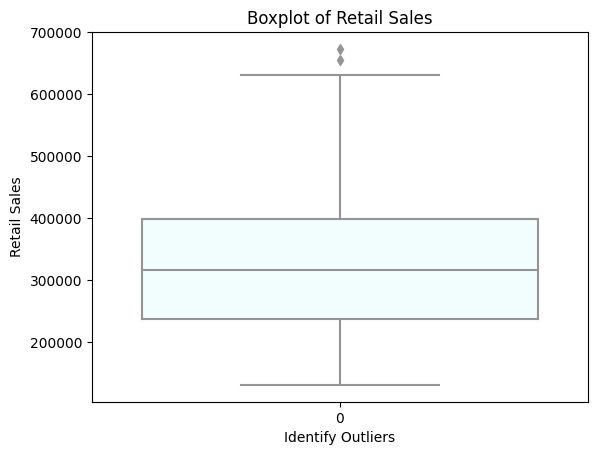

In [22]:
# Import seaborn and matplotlib libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot of retail value using seaborn
sns.boxplot(retail, color='azure')

# Add a title
plt.title("Boxplot of Retail Sales")

# Label the x and y axes
plt.xlabel("Identify Outliers")
plt.ylabel("Retail Sales")

# Show the plot
plt.show()

In [23]:
# I calculate the z-scores for each data point and determine if any values fall outside a certain threshold,
# values that are more than a few standard deviations away from the mean can be considered outliers.

In [24]:
# Calculate the mean, median, and standard deviation for retail
mean = retail.mean()
median = retail.median()
std = retail.std()
# Define the threshold for outliers 
# which is set to more than 3 standard deviations away from the mean 
threshold = 3
# Calculate the z-scores for each data point.
# Subtracts the mean from each data point and then divides by the standard deviation to standardize the data.
# Calculating the z-scores, I can determine how far each data point deviates from the mean in terms of standard deviations.
# Positive z-scores indicate values above the mean, while negative z-scores indicate values below the mean.
z_scores = (retail - mean) / std

# Identify the outliers based on the threshold.
# The abs() function is used to take the absolute value of each z-score, 
# ensuring that both positive and negative deviations from the mean are considered.
# The resulting outliers are stored in the outliers variable, 
# which contains the subset of "stock_market" values that are identified as outliers 
# based on their z-scores exceeding the threshold of 3.
outliers = retail[abs(z_scores) > threshold]

# Print the identified outliers
print("Identified outliers:")
print(outliers)

Identified outliers:
Series([], Name: retail_value, dtype: float64)


In [25]:
# There is no outliers for retail sales in the z-scores method.

## Time Series Plots Analysis

In [26]:
# Import few libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

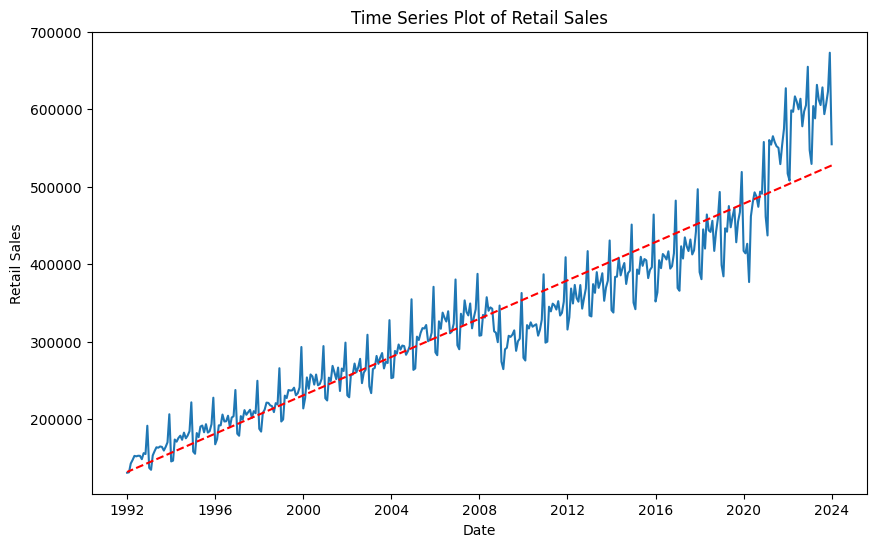

In [27]:
# Convert the 'Date' column in the DataFrame 'final_df' to datetime format using the pd.to_datetime() function
df['date'] = pd.to_datetime(df['date'], unit='ns')

# Create a new figure with a specified size using the plt.figure() function from the matplotlib.pyplot library. 
# The figsize parameter determines the width and height of the figure in inches.
plt.figure(figsize=(10, 6))

# Plot a line graph using the 'Date' column as the x-axis and the 'tm_closePrice' column as the y-axis. 
# It visualizes the time series of Toyota stock prices over the specified period, 2019-2024.
plt.plot(df['date'], df['retail_value'])

# Calculate the slope
z = np.polyfit(range(len(df)), df['retail_value'], 1)
p = np.poly1d(z)

# Plot the slope
plt.plot(df['date'], p(range(len(df))), linestyle='--', color='red')

# Set the x-axis label of the plot as 'Date'
plt.xlabel('Date')

# Set the y-axis label of the plot as 'Apple Stock Price'
plt.ylabel('Retail Sales')

# Set the title of the plot as 'Time Series Plot of Apple Stock Prices'
plt.title('Time Series Plot of Retail Sales')

# Display the plot.
plt.show()

In [28]:
# I can visualize the historical trends and fluctuations in retail sales over time. 
# The slope of this plot is positive, indicating an upward trend.
# The plot helps to identify patterns, and overall movements in the retail sales, 
# providing insights into the historical performance of retail sales performance.

## Preparing The data

In [29]:
# list of columns
df.columns

Index(['Unnamed: 0', 'date', 'retail_value', 'retail_year', 'retail_month'], dtype='object')

In [30]:
# Convert Date column to Datetime column
df.date = pd.to_datetime(df.date,format = '%m/%d/%Y %I:%M:%S %p')

In [31]:
# Remove unneccesary columns
df = df[['date','retail_value']]
# Show few records
df.head()

,date,retail_value
0,2024-01-01,554784.0
1,2023-12-01,672967.0
2,2023-11-01,623010.0
3,2023-10-01,606718.0
4,2023-09-01,593695.0


In [63]:
# Select the columns 'date' and 'retail_value' from the DataFrame df and assigns them to a new DataFrame df_prophet.
df_prophet = df[['date','retail_value']]

In [64]:
# Show the result
df_prophet

,date,retail_value
0,2024-01-01,554784.0
1,2023-12-01,672967.0
2,2023-11-01,623010.0
3,2023-10-01,606718.0
4,2023-09-01,593695.0
...,...,...
380,1992-05-01,152420.0
381,1992-04-01,147175.0
382,1992-03-01,142488.0
383,1992-02-01,131244.0


## Rename columns

In [67]:
# Renames the columns of the DataFrame df_prophet from 'date' to 'ds' and from 'retail_value' to 'y'
# In Prophet, the convention is to have the time column named 'ds' (for dates) and the target variable column named 'y'.
df_prophet=df_prophet.rename(columns={'date':'ds','retail_value':'y'})

In [68]:
# Show the result
df_prophet

,ds,y
0,2024-01-01,554784.0
1,2023-12-01,672967.0
2,2023-11-01,623010.0
3,2023-10-01,606718.0
4,2023-09-01,593695.0
...,...,...
380,1992-05-01,152420.0
381,1992-04-01,147175.0
382,1992-03-01,142488.0
383,1992-02-01,131244.0


## Train the model

In [69]:
# Create an instance of the Prophet class and assigns it to the variable model
model = Prophet()
# Fit the Prophet model to the data contained in the DataFrame df_prophet.
model.fit(df_prophet)

21:56:23 - cmdstanpy - INFO - Chain [1] start processing
21:56:23 - cmdstanpy - INFO - Chain [1] done processing


## Predict the model

In [71]:
# This line generates a DataFrame named pred containing future dates for which I want to make predictions.
# periods=36 specifies the number of future periods (in this case, 36) for which I want to generate predictions.
# freq='M' specifies the frequency of the dates, with 'M' indicating monthly frequency. 
# This means that the future dates will be spaced one month apart.
pred=model.make_future_dataframe(periods=36,freq='M')
# This line uses the fitted Prophet model (model) to make predictions for the future dates contained in the DataFrame pred.
forcast = model.predict(pred)

In [72]:
# Show the result
forcast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1992-01-01,144558.022369,88022.366199,127658.667360,144558.022369,144558.022369,-37023.937137,-37023.937137,-37023.937137,-37023.937137,-37023.937137,-37023.937137,0.0,0.0,0.0,107534.085232
1,1992-02-01,145555.474042,92250.339468,128364.186544,145555.474042,145555.474042,-35245.212140,-35245.212140,-35245.212140,-35245.212140,-35245.212140,-35245.212140,0.0,0.0,0.0,110310.261903
2,1992-03-01,146488.573995,132398.804290,170353.595560,146488.573995,146488.573995,4197.307031,4197.307031,4197.307031,4197.307031,4197.307031,4197.307031,0.0,0.0,0.0,150685.881026
3,1992-04-01,147486.025668,120768.585437,161454.570323,147486.025668,147486.025668,-6715.259949,-6715.259949,-6715.259949,-6715.259949,-6715.259949,-6715.259949,0.0,0.0,0.0,140770.765720
4,1992-05-01,148451.301481,141637.983275,180284.546071,148451.301481,148451.301481,13084.852945,13084.852945,13084.852945,13084.852945,13084.852945,13084.852945,0.0,0.0,0.0,161536.154426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,2026-08-31,701141.615290,663811.637804,704885.057372,696335.229641,706493.873360,-16500.333683,-16500.333683,-16500.333683,-16500.333683,-16500.333683,-16500.333683,0.0,0.0,0.0,684641.281606
417,2026-09-30,703756.051363,679596.165095,719308.445778,698589.452489,709377.597338,-4181.850792,-4181.850792,-4181.850792,-4181.850792,-4181.850792,-4181.850792,0.0,0.0,0.0,699574.200571
418,2026-10-31,706457.635306,693595.608871,733061.342488,701004.097003,712379.495827,6948.805212,6948.805212,6948.805212,6948.805212,6948.805212,6948.805212,0.0,0.0,0.0,713406.440518
419,2026-11-30,709072.071380,742439.057809,785462.430129,703399.627699,715331.096611,54153.537433,54153.537433,54153.537433,54153.537433,54153.537433,54153.537433,0.0,0.0,0.0,763225.608813


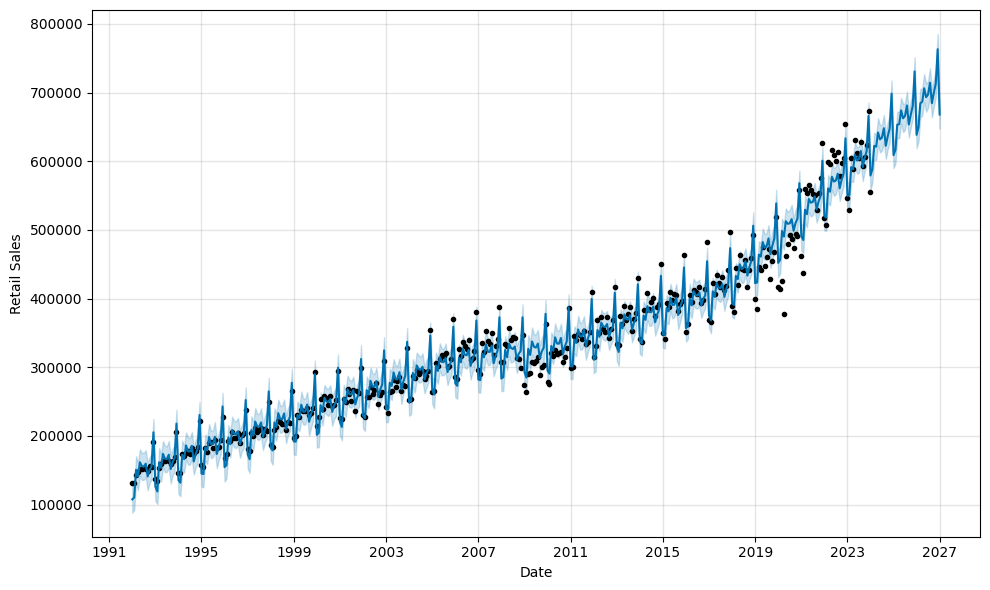

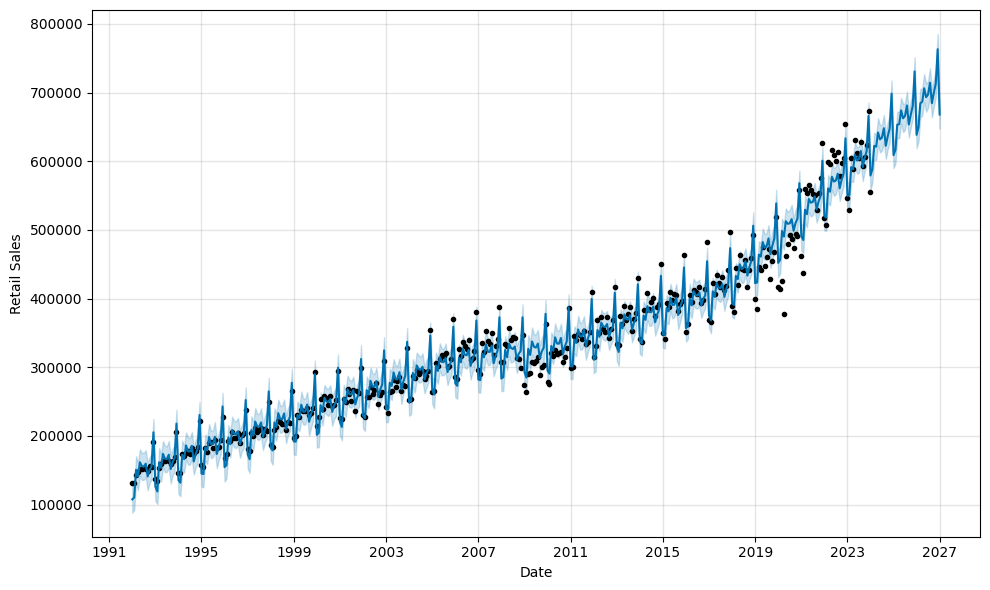

In [73]:
# Generate a plot of the forecasted values produced by the Prophet model.
# that allows me to visualize the forecasted values.
model.plot(forcast,xlabel="Date",ylabel="Retail Sales")

In [74]:
# This plot can help me visualize the trends, patterns, and uncertainties in the forecasted values 
# and assess the performance of the forecasting model.

# In the next 3 years, the retail sales continue to be upward trend.